In [1]:
import pandas as pd
credit_card_data = pd.read_csv('creditcard.csv')
print('Now the Dataset is ready to use')

Now the Dataset is ready to use


In [2]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
fraud_activity_data = credit_card_data[credit_card_data['Class'] == 1]
fraud_activity_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [4]:
not_fraud_data = credit_card_data[credit_card_data['Class'] != 1]
not_fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
not_fraud_data = not_fraud_data.sample(frac=1) # frac = 1 means return all data after shuffeling
not_fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18582,29611.0,1.050435,-0.014281,0.048255,0.474511,-0.167087,-0.574136,0.296899,-0.035339,-0.380876,...,-0.256644,-0.961988,0.136102,0.198502,0.109995,0.132956,-0.067825,0.008510,74.90,0
58645,48485.0,-0.806414,1.512928,1.882612,2.724326,-0.451574,0.340421,-0.206250,0.672164,-1.665266,...,0.299455,0.842500,-0.154453,0.368098,-0.193954,0.308761,0.270724,0.121463,10.65,0
178334,123588.0,-1.585615,-0.258818,-0.848843,-2.393434,1.580987,-0.907847,0.530876,0.362606,0.240618,...,-0.235009,-0.383645,0.826805,-1.377118,-0.336403,0.423958,0.205531,0.055066,4.00,0
112971,72876.0,-1.022912,2.005399,-0.248342,0.749492,0.062517,-0.949299,0.748691,0.091536,0.155262,...,0.056876,0.730848,0.154086,0.404605,-0.614275,-0.414210,0.587959,0.192169,0.65,0
104477,69081.0,1.194663,0.697414,-0.367346,1.298831,0.296374,-0.767379,0.253307,-0.122790,-0.137059,...,-0.036886,0.015312,-0.097425,-0.051641,0.627774,-0.298630,0.053562,0.054691,1.00,0


In [6]:
not_fraud_data.reset_index(inplace = True)

not_fraud_data.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,18582,29611.0,1.050435,-0.014281,0.048255,0.474511,-0.167087,-0.574136,0.296899,-0.035339,...,-0.256644,-0.961988,0.136102,0.198502,0.109995,0.132956,-0.067825,0.008510,74.90,0
1,58645,48485.0,-0.806414,1.512928,1.882612,2.724326,-0.451574,0.340421,-0.206250,0.672164,...,0.299455,0.842500,-0.154453,0.368098,-0.193954,0.308761,0.270724,0.121463,10.65,0
2,178334,123588.0,-1.585615,-0.258818,-0.848843,-2.393434,1.580987,-0.907847,0.530876,0.362606,...,-0.235009,-0.383645,0.826805,-1.377118,-0.336403,0.423958,0.205531,0.055066,4.00,0
3,112971,72876.0,-1.022912,2.005399,-0.248342,0.749492,0.062517,-0.949299,0.748691,0.091536,...,0.056876,0.730848,0.154086,0.404605,-0.614275,-0.414210,0.587959,0.192169,0.65,0
4,104477,69081.0,1.194663,0.697414,-0.367346,1.298831,0.296374,-0.767379,0.253307,-0.122790,...,-0.036886,0.015312,-0.097425,-0.051641,0.627774,-0.298630,0.053562,0.054691,1.00,0


In [7]:
not_fraud_data.drop('index', axis = 1, inplace = True)

not_fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,29611.0,1.050435,-0.014281,0.048255,0.474511,-0.167087,-0.574136,0.296899,-0.035339,-0.380876,...,-0.256644,-0.961988,0.136102,0.198502,0.109995,0.132956,-0.067825,0.008510,74.90,0
1,48485.0,-0.806414,1.512928,1.882612,2.724326,-0.451574,0.340421,-0.206250,0.672164,-1.665266,...,0.299455,0.842500,-0.154453,0.368098,-0.193954,0.308761,0.270724,0.121463,10.65,0
2,123588.0,-1.585615,-0.258818,-0.848843,-2.393434,1.580987,-0.907847,0.530876,0.362606,0.240618,...,-0.235009,-0.383645,0.826805,-1.377118,-0.336403,0.423958,0.205531,0.055066,4.00,0
3,72876.0,-1.022912,2.005399,-0.248342,0.749492,0.062517,-0.949299,0.748691,0.091536,0.155262,...,0.056876,0.730848,0.154086,0.404605,-0.614275,-0.414210,0.587959,0.192169,0.65,0
4,69081.0,1.194663,0.697414,-0.367346,1.298831,0.296374,-0.767379,0.253307,-0.122790,-0.137059,...,-0.036886,0.015312,-0.097425,-0.051641,0.627774,-0.298630,0.053562,0.054691,1.00,0


In [8]:
not_fraud_data = not_fraud_data[:808]
not_fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,29611.0,1.050435,-0.014281,0.048255,0.474511,-0.167087,-0.574136,0.296899,-0.035339,-0.380876,...,-0.256644,-0.961988,0.136102,0.198502,0.109995,0.132956,-0.067825,0.008510,74.90,0
1,48485.0,-0.806414,1.512928,1.882612,2.724326,-0.451574,0.340421,-0.206250,0.672164,-1.665266,...,0.299455,0.842500,-0.154453,0.368098,-0.193954,0.308761,0.270724,0.121463,10.65,0
2,123588.0,-1.585615,-0.258818,-0.848843,-2.393434,1.580987,-0.907847,0.530876,0.362606,0.240618,...,-0.235009,-0.383645,0.826805,-1.377118,-0.336403,0.423958,0.205531,0.055066,4.00,0
3,72876.0,-1.022912,2.005399,-0.248342,0.749492,0.062517,-0.949299,0.748691,0.091536,0.155262,...,0.056876,0.730848,0.154086,0.404605,-0.614275,-0.414210,0.587959,0.192169,0.65,0
4,69081.0,1.194663,0.697414,-0.367346,1.298831,0.296374,-0.767379,0.253307,-0.122790,-0.137059,...,-0.036886,0.015312,-0.097425,-0.051641,0.627774,-0.298630,0.053562,0.054691,1.00,0


In [9]:
len(not_fraud_data)

808

In [10]:
# Now concatenate both dataframes

credit_card_data_sample = pd.concat([fraud_activity_data, not_fraud_data])


In [11]:
del fraud_activity_data
del not_fraud_data
del credit_card_data


In [12]:
credit_card_data_sample.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [13]:
# shuffle this data frame

credit_card_data_sample = credit_card_data_sample.sample(frac=1).reset_index(drop=True)

In [14]:
# Understand data

In [15]:
credit_card_data_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,66037.0,0.286302,1.399345,-1.682503,3.864377,-1.185373,-0.341732,-2.539380,0.768378,-1.547882,...,0.352456,-0.243678,-0.194079,-0.172201,0.742237,0.127790,0.569731,0.291206,7.53,1
1,56098.0,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,170.92,1
2,71326.0,1.242832,0.221550,0.403572,0.422440,-0.225134,-0.468892,-0.023173,-0.058870,-0.250114,...,-0.223732,-0.661173,0.079070,0.002943,0.245128,0.096576,-0.030620,0.006138,0.89,0
3,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1
4,18868.0,-1.562982,0.096445,2.234481,1.519478,-1.082684,0.829197,-0.177348,0.801448,0.864711,...,0.304993,0.625487,0.212558,0.152335,0.208129,-0.121067,-0.070741,-0.035338,201.91,0


In [16]:
credit_card_data_sample.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1295,89038.0,2.018754,-0.151547,-1.226684,0.292833,-0.062267,-1.097662,0.275160,-0.426809,1.021224,...,0.197209,0.980933,-0.093847,0.141628,0.497987,-0.309413,0.019064,-0.052863,20.85,0
1296,159662.0,2.025074,0.238757,-1.566873,0.638096,-0.002928,-1.698966,0.260362,-0.388649,0.579150,...,0.219224,0.815944,0.040421,0.323568,0.179630,-0.123040,0.002323,-0.026116,0.02,0
1297,110617.0,-1.101035,-1.674928,-0.573388,5.617556,0.765556,0.440607,1.934740,-1.019788,-0.193244,...,-0.412526,-0.208823,0.344833,1.091435,-0.686513,0.075809,0.033865,-0.832855,635.10,1
1298,71315.0,-1.157328,0.626254,1.721732,-1.089315,-0.489614,-0.060290,-0.277905,0.759297,0.039815,...,0.238446,0.823278,-0.150415,0.335684,-0.229222,0.990692,0.184158,0.080773,1.00,0
1299,163884.0,2.346788,-1.287690,-1.633887,-1.712112,-0.772929,-0.878245,-0.752703,-0.356667,-1.471163,...,0.032453,0.539336,-0.028999,-0.767981,0.159096,0.120103,-0.016983,-0.066912,31.98,0


In [17]:
credit_card_data_sample.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
credit_card_data_sample.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,90484.221538,-1.783364,1.414069,-2.727869,1.726187,-1.236963,-0.512739,-2.048397,0.212700,-0.973073,...,0.253869,0.026277,-0.004757,-0.044545,0.015992,0.010584,0.054015,0.023262,110.785415,0.378462
std,48447.928622,4.986961,3.369815,5.633853,3.036426,3.778078,1.677887,5.302781,4.280249,2.169386,...,2.448476,1.079252,1.083735,0.569205,0.638490,0.466622,0.930772,0.388367,282.561920,0.485190
min,52.000000,-30.552380,-15.447182,-31.103685,-4.964819,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.241583,-4.781606,-1.373105,-7.263482,-2.814182,0.000000,0.000000
25%,48567.500000,-2.177036,-0.282882,-3.824497,-0.331292,-1.450364,-1.274757,-1.993048,-0.226852,-1.764765,...,-0.195497,-0.535607,-0.205708,-0.393958,-0.305275,-0.297201,-0.069122,-0.061025,1.997500,0.000000
50%,83195.500000,-0.580019,0.664664,-0.911222,0.824457,-0.315763,-0.545336,-0.321199,0.113042,-0.480486,...,0.111519,0.057591,-0.026156,0.014982,0.050324,-0.029400,0.028291,0.024733,19.860000,0.000000
75%,136129.250000,1.146280,2.165842,0.430088,3.320337,0.518255,0.154500,0.388622,0.715892,0.347506,...,0.489282,0.581317,0.177757,0.382076,0.386337,0.276878,0.321412,0.168282,99.325000,1.000000
max,172140.000000,2.397168,22.057729,3.327621,12.114672,11.095089,6.888007,15.384417,20.007208,5.143708,...,27.202839,8.361985,11.990865,1.257058,2.208209,2.745261,3.052358,2.092304,4738.790000,1.000000


In [19]:
credit_card_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 31 columns):
Time      1300 non-null float64
V1        1300 non-null float64
V2        1300 non-null float64
V3        1300 non-null float64
V4        1300 non-null float64
V5        1300 non-null float64
V6        1300 non-null float64
V7        1300 non-null float64
V8        1300 non-null float64
V9        1300 non-null float64
V10       1300 non-null float64
V11       1300 non-null float64
V12       1300 non-null float64
V13       1300 non-null float64
V14       1300 non-null float64
V15       1300 non-null float64
V16       1300 non-null float64
V17       1300 non-null float64
V18       1300 non-null float64
V19       1300 non-null float64
V20       1300 non-null float64
V21       1300 non-null float64
V22       1300 non-null float64
V23       1300 non-null float64
V24       1300 non-null float64
V25       1300 non-null float64
V26       1300 non-null float64
V27       1300 non-null float

In [20]:
credit_card_data_sample.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [21]:
fraud_activity_count = len(credit_card_data_sample[credit_card_data_sample['Class'] == 1])

In [22]:
non_fraud_activity_count = len(credit_card_data_sample[credit_card_data_sample['Class'] == 0])

In [23]:
activity = ['Not Fraud', 'Fraud']
count = [non_fraud_activity_count, fraud_activity_count]
activity_distribution = pd.DataFrame({'Activity': activity,
                                     'Count': count})

activity_distribution

,Activity,Count
0,Not Fraud,808
1,Fraud,492


In [24]:
# Bar chart
import matplotlib.pyplot as plt
activity = activity_distribution['Activity']
count = activity_distribution['Count']
plt.figure(figsize=(12,6))
plt.bar(activity, count)
plt.title('Visualize Data Distribution: Fraud V/s Non-Fraud Activity in Credit Cards')
plt.xlabel("Activity Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

<Figure size 1200x600 with 1 Axes>

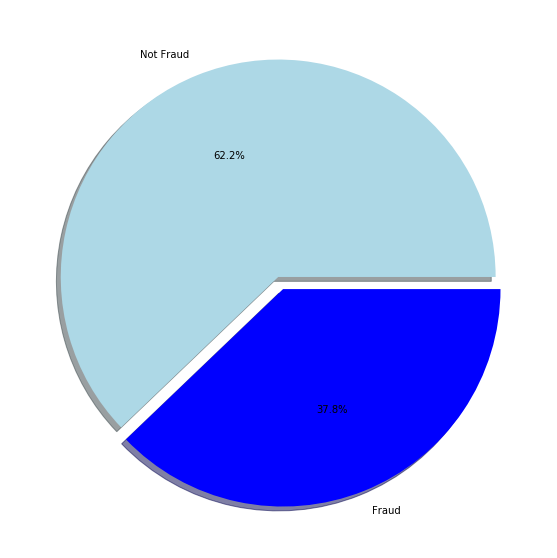

In [25]:
import numpy as np
count = activity_distribution['Count']
labels = activity_distribution['Activity']
colors = ['lightblue', 'blue']
explode = [0.01, 0.05]
plt.figure(figsize=(12,10))
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.pie(count, explode=explode, labels=labels, shadow = 'black', autopct = '%1.1f%%', colors = colors)

plt.show() 
#autopct='%1.1f%%',

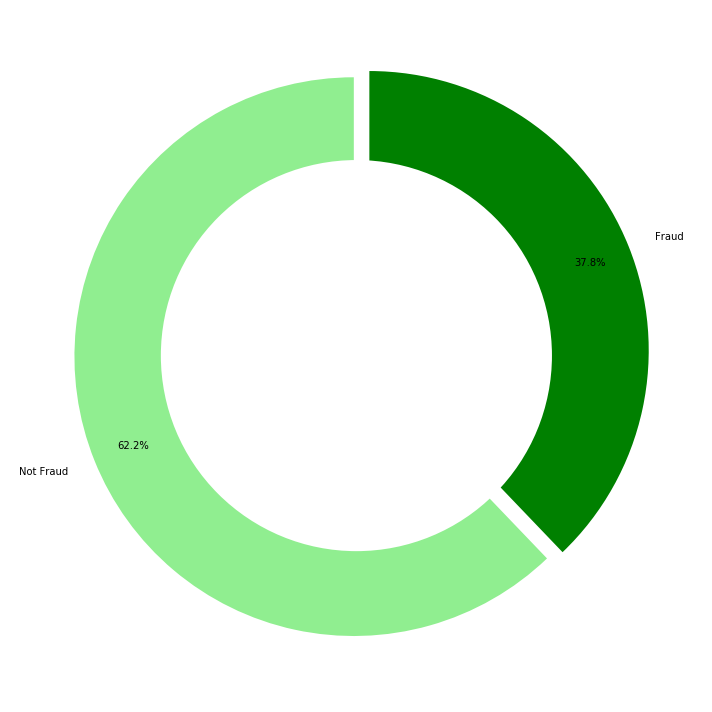

In [26]:
# Donut Chart
count = activity_distribution['Count']
labels = activity_distribution['Activity']
colors = ['lightgreen', 'green']
explode = [0.01, 0.05]
plt.figure(figsize=(12,10))
plt.pie(count, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode, labels = labels, colors = colors)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [27]:
# To find the correlation among the columns using pearson method 
correlation = credit_card_data_sample.corr(method ='pearson') 
correlation.reset_index(inplace = True)

In [28]:
correlation

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,Time,1.000000,0.229953,-0.193788,0.116032,-0.197228,0.276321,0.108437,0.202496,-0.122706,...,-0.052720,0.143219,0.050917,0.003285,-0.177497,-0.074595,-0.126436,-0.002840,-0.009062,-0.156896
1,V1,0.229953,1.000000,-0.797195,0.867035,-0.595467,0.848558,0.301411,0.857995,-0.086841,...,0.000484,-0.040682,-0.053827,-0.063025,-0.068443,0.037899,0.182073,0.174314,-0.048782,-0.467814
2,V2,-0.193788,-0.797195,1.000000,-0.837911,0.660879,-0.738719,-0.320342,-0.837666,-0.009971,...,0.045450,-0.010164,0.091001,0.009374,0.115985,0.019834,-0.114799,0.001859,-0.279767,0.511886
3,V3,0.116032,0.867035,-0.837911,1.000000,-0.755408,0.830795,0.443075,0.876103,-0.172787,...,0.007534,-0.047059,-0.032249,0.024916,-0.084336,-0.022639,0.083718,0.109528,-0.016362,-0.596559
4,V4,-0.197228,-0.595467,0.660879,-0.755408,1.000000,-0.571787,-0.424566,-0.697652,0.102570,...,0.009175,0.092746,0.012824,-0.071033,-0.031784,0.132297,0.003090,-0.024841,0.007065,0.723918
5,V5,0.276321,0.848558,-0.738719,0.830795,-0.571787,1.000000,0.275019,0.813437,-0.196877,...,0.026204,-0.076794,-0.102809,-0.101818,-0.067848,0.055921,0.170688,0.159306,-0.168916,-0.395525
6,V6,0.108437,0.301411,-0.320342,0.443075,-0.424566,0.275019,1.000000,0.297815,-0.509465,...,0.004573,0.015722,0.319819,-0.034977,-0.125996,-0.046052,-0.151416,-0.050836,0.239764,-0.411741
7,V7,0.202496,0.857995,-0.837666,0.876103,-0.697652,0.813437,0.297815,1.000000,0.073916,...,0.025264,-0.102434,-0.052616,-0.032180,0.044360,-0.003515,0.198581,0.120229,0.163126,-0.518232
8,V8,-0.122706,-0.086841,-0.009971,-0.172787,0.102570,-0.196877,-0.509465,0.073916,1.000000,...,-0.099992,0.026920,-0.387698,0.065590,0.197786,0.038400,0.265502,-0.009671,-0.000369,0.065280
9,V9,0.174900,0.640463,-0.665674,0.740769,-0.765659,0.640203,0.353617,0.746364,-0.077069,...,0.125141,-0.189307,-0.042498,0.014936,-0.004901,-0.120048,0.095580,0.077592,0.015023,-0.578638


In [29]:
correlation.rename(columns = {"index": "Columns" }, inplace = True)

In [30]:
rounded_correlation = round(correlation['Class'], 2)
rounded_correlation

0    -0.16
1    -0.47
2     0.51
3    -0.60
4     0.72
5    -0.40
6    -0.41
7    -0.52
8     0.07
9    -0.58
10   -0.66
11    0.71
12   -0.72
13   -0.05
14   -0.78
15   -0.03
16   -0.63
17   -0.60
18   -0.50
19    0.29
20    0.15
21    0.15
22   -0.01
23   -0.03
24   -0.08
25    0.03
26    0.07
27    0.10
28    0.11
29    0.03
30    1.00
Name: Class, dtype: float64

In [31]:
correlation = correlation['Columns'].to_frame()
correlation

,Columns
0,Time
1,V1
2,V2
3,V3
4,V4
5,V5
6,V6
7,V7
8,V8
9,V9


In [32]:
correlation['Correlation'] = rounded_correlation

In [33]:
correlation

,Columns,Correlation
0,Time,-0.16
1,V1,-0.47
2,V2,0.51
3,V3,-0.60
4,V4,0.72
5,V5,-0.40
6,V6,-0.41
7,V7,-0.52
8,V8,0.07
9,V9,-0.58


In [34]:
correlation.drop(30, inplace = True)

In [35]:
correlation

,Columns,Correlation
0,Time,-0.16
1,V1,-0.47
2,V2,0.51
3,V3,-0.60
4,V4,0.72
5,V5,-0.40
6,V6,-0.41
7,V7,-0.52
8,V8,0.07
9,V9,-0.58


In [36]:
# finding pvalue of all columns with class columns
from scipy import stats
pvalue = []
for i in credit_card_data_sample:
    pearson_coef, p_value = stats.pearsonr(credit_card_data_sample[i], credit_card_data_sample['Class'])
    pvalue.append(p_value)
    
pvalue

[1.2945322564215804e-08,
 1.1443166904784417e-71,
 9.849054318408935e-88,
 3.867410188354264e-126,
 1.6515093724484749e-211,
 6.243046445460266e-50,
 2.3447919283805048e-54,
 3.020659903764532e-90,
 0.018575075053539856,
 4.667116198123527e-117,
 5.876684264016282e-164,
 5.077217549310585e-201,
 1.3017536822111757e-206,
 0.05902628044556958,
 3.8750194046541466e-267,
 0.22520524926253574,
 5.852799552785479e-146,
 6.796693382030132e-128,
 2.2461659151282085e-83,
 7.709450966024819e-27,
 3.002866825029165e-08,
 1.1070524174100063e-07,
 0.750026373051194,
 0.35623768538434497,
 0.0027166799992362958,
 0.2621245029208929,
 0.013231067317179145,
 0.00041596254895656773,
 0.0001418820495361926,
 0.2554042782566107,
 0.0]

In [37]:
del pvalue[-1]

In [38]:
correlation['P-Value'] = pvalue
correlation

,Columns,Correlation,P-Value
0,Time,-0.16,1.294532e-08
1,V1,-0.47,1.144317e-71
2,V2,0.51,9.849054e-88
3,V3,-0.60,3.867410e-126
4,V4,0.72,1.651509e-211
5,V5,-0.40,6.243046e-50
6,V6,-0.41,2.344792e-54
7,V7,-0.52,3.020660e-90
8,V8,0.07,1.857508e-02
9,V9,-0.58,4.667116e-117


In [39]:
correlation_state = []
for i in correlation['P-Value']:
    
    if i < 0.001:
        correlation_state.append('Strong Certainity')
        
    elif i < 0.05:
        correlation_state.append('Moderate Certainity')
        
    elif i < 0.1:
        correlation_state.append('Weak Certainity')
      
    elif i > 0.1:
        correlation_state.append('No Certainity')
    
    
    
correlation_state    

['Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Moderate Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Weak Certainity',
 'Strong Certainity',
 'No Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'No Certainity',
 'No Certainity',
 'Moderate Certainity',
 'No Certainity',
 'Moderate Certainity',
 'Strong Certainity',
 'Strong Certainity',
 'No Certainity']

In [40]:
correlation['Correlation State'] = correlation_state

In [41]:
correlation

,Columns,Correlation,P-Value,Correlation State
0,Time,-0.16,1.294532e-08,Strong Certainity
1,V1,-0.47,1.144317e-71,Strong Certainity
2,V2,0.51,9.849054e-88,Strong Certainity
3,V3,-0.60,3.867410e-126,Strong Certainity
4,V4,0.72,1.651509e-211,Strong Certainity
5,V5,-0.40,6.243046e-50,Strong Certainity
6,V6,-0.41,2.344792e-54,Strong Certainity
7,V7,-0.52,3.020660e-90,Strong Certainity
8,V8,0.07,1.857508e-02,Moderate Certainity
9,V9,-0.58,4.667116e-117,Strong Certainity


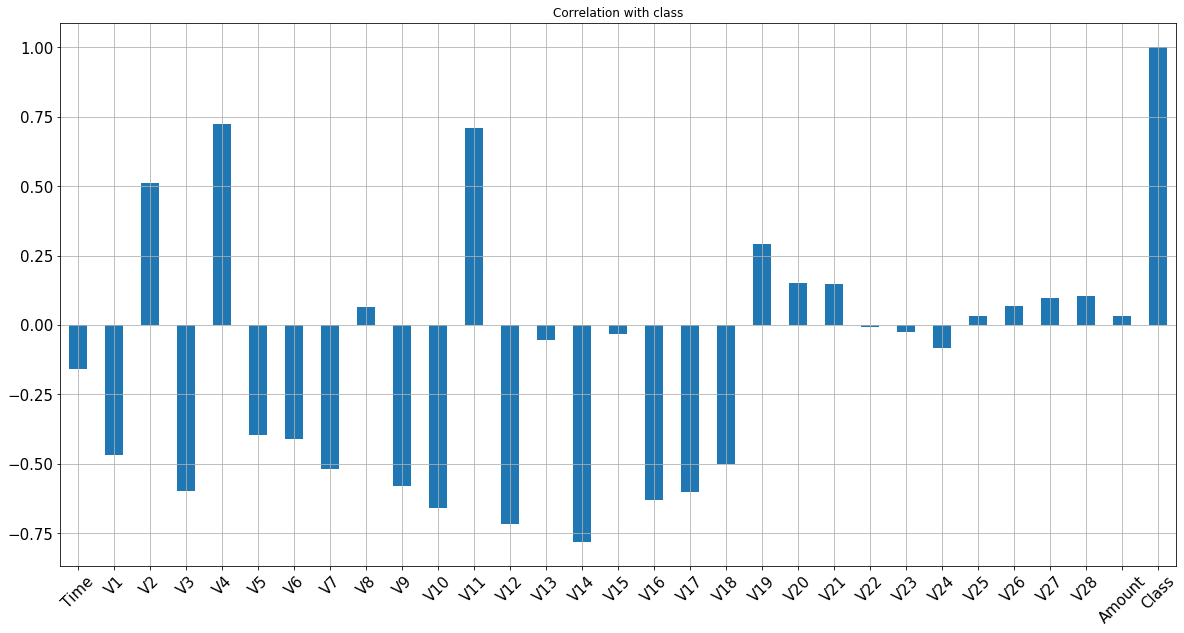

In [42]:
credit_card_data_sample.corrwith(credit_card_data_sample.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [43]:
correlation

,Columns,Correlation,P-Value,Correlation State
0,Time,-0.16,1.294532e-08,Strong Certainity
1,V1,-0.47,1.144317e-71,Strong Certainity
2,V2,0.51,9.849054e-88,Strong Certainity
3,V3,-0.60,3.867410e-126,Strong Certainity
4,V4,0.72,1.651509e-211,Strong Certainity
5,V5,-0.40,6.243046e-50,Strong Certainity
6,V6,-0.41,2.344792e-54,Strong Certainity
7,V7,-0.52,3.020660e-90,Strong Certainity
8,V8,0.07,1.857508e-02,Moderate Certainity
9,V9,-0.58,4.667116e-117,Strong Certainity


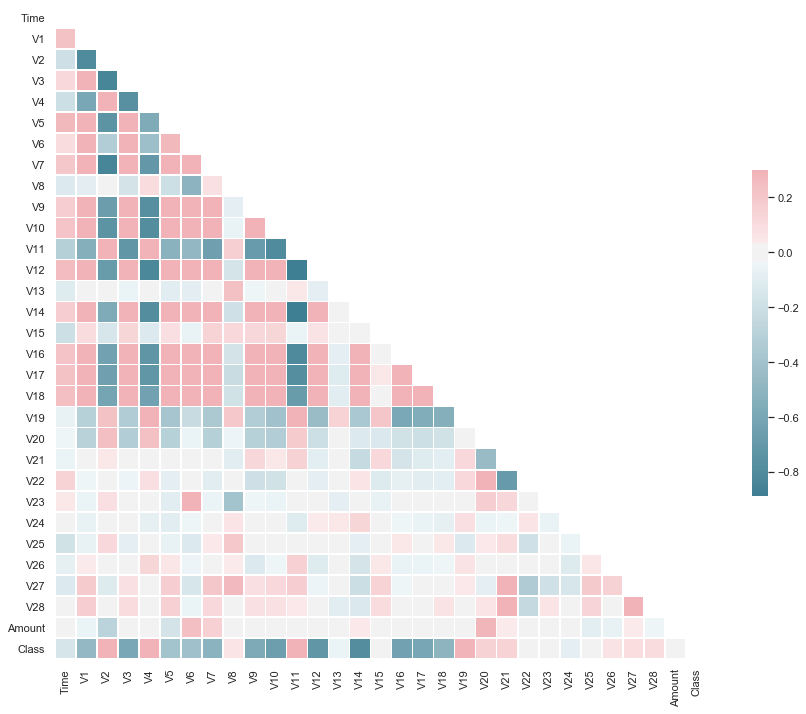

In [44]:
import seaborn as sns
sns.set(style="white")
corr = credit_card_data_sample.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
credit_card_data_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,66037.0,0.286302,1.399345,-1.682503,3.864377,-1.185373,-0.341732,-2.539380,0.768378,-1.547882,...,0.352456,-0.243678,-0.194079,-0.172201,0.742237,0.127790,0.569731,0.291206,7.53,1
1,56098.0,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,170.92,1
2,71326.0,1.242832,0.221550,0.403572,0.422440,-0.225134,-0.468892,-0.023173,-0.058870,-0.250114,...,-0.223732,-0.661173,0.079070,0.002943,0.245128,0.096576,-0.030620,0.006138,0.89,0
3,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1
4,18868.0,-1.562982,0.096445,2.234481,1.519478,-1.082684,0.829197,-0.177348,0.801448,0.864711,...,0.304993,0.625487,0.212558,0.152335,0.208129,-0.121067,-0.070741,-0.035338,201.91,0


In [46]:
# Feature scaling of amount attribute
from sklearn.preprocessing import StandardScaler
credit_card_data_sample['normalizedAmount'] = StandardScaler().fit_transform(credit_card_data_sample['Amount'].values.reshape(-1,1))
credit_card_data_sample = credit_card_data_sample.drop(['Amount'],axis=1)

In [47]:
credit_card_data_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,66037.0,0.286302,1.399345,-1.682503,3.864377,-1.185373,-0.341732,-2.539380,0.768378,-1.547882,...,0.352456,-0.243678,-0.194079,-0.172201,0.742237,0.127790,0.569731,0.291206,1,-0.365566
1,56098.0,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1,0.212901
2,71326.0,1.242832,0.221550,0.403572,0.422440,-0.225134,-0.468892,-0.023173,-0.058870,-0.250114,...,-0.223732,-0.661173,0.079070,0.002943,0.245128,0.096576,-0.030620,0.006138,0,-0.389075
3,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,1,-0.378418
4,18868.0,-1.562982,0.096445,2.234481,1.519478,-1.082684,0.829197,-0.177348,0.801448,0.864711,...,0.304993,0.625487,0.212558,0.152335,0.208129,-0.121067,-0.070741,-0.035338,0,0.322618


In [48]:
# Now choose features and target variable
y = credit_card_data_sample.iloc[:, credit_card_data_sample.columns == 'Class']
y[:5]

,Class
0,1
1,1
2,0
3,1
4,0


In [49]:
X1 = credit_card_data_sample[['V1', 'V2', 'V3','V4','V7','V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
X2 = credit_card_data_sample[['V1', 'V2', 'V3','V4','V5','V6','V7','V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
X3 = credit_card_data_sample[['V2', 'V3','V4', 'V7','V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
X4 = credit_card_data_sample[['V2', 'V3','V4', 'V7','V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]

In [50]:
# X1 & y train test split
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 390
number of training samples: 910


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# training
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [53]:
# predicting
yhat = neigh.predict(x_test)
yhat[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [54]:
# accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", round(metrics.accuracy_score(y_train, neigh.predict(x_train)),2))
print("Test set Accuracy: " , round(metrics.accuracy_score(y_test, yhat),2))

Train set Accuracy:  0.96
Test set Accuracy:  0.95


Try with different values of k

In [55]:
k_value = []
accuracy = []
for i in range(1, 11):
    k = i
    neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    result = round(metrics.accuracy_score(y_test, yhat),2)
    k_value.append(k)
    accuracy.append(result)

result_with_diff_ks = pd.DataFrame({'K-Value': k_value,
                                   'Accuracy': accuracy})
result_with_diff_ks

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: Da

,K-Value,Accuracy
0,1,0.94
1,2,0.95
2,3,0.94
3,4,0.95
4,5,0.95
5,6,0.95
6,7,0.95
7,8,0.95
8,9,0.95
9,10,0.95


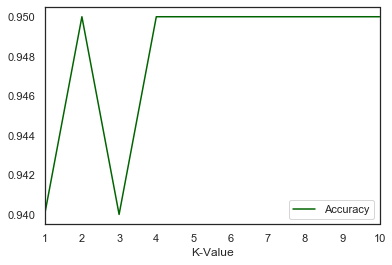

In [56]:
result_with_diff_ks.plot(kind = 'line', x = 'K-Value', y = 'Accuracy', color = 'darkgreen')

In [57]:
print('The best value of k is '+str(result_with_diff_ks.iloc[result_with_diff_ks['Accuracy'].idxmax()]['K-Value']))

The best value of k is 2.0


So now we train the model with k = 3

In [58]:
# training
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat = neigh.predict(x_test)
print("Train set Accuracy: ", round(metrics.accuracy_score(y_train, neigh.predict(x_train)),2))
print("Test set Accuracy: " , round(metrics.accuracy_score(y_test, yhat),2))

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Train set Accuracy:  0.97
Test set Accuracy:  0.94


In [59]:
# Using Cross Validation
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(neigh, X1, y, cv=4)

C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

In [60]:
Rcross

array([0.92307692, 0.96923077, 0.93538462, 0.96307692])

In [61]:
print('By cross validation Accuracy is '+str(round(Rcross.mean(), 2)))

By cross validation Accuracy is 0.95


Try with different no.of CVs

In [62]:
cv_s = []
rcross_scores = []

for i in range(2,11):
    Rcross = cross_val_score(neigh, X1, y, cv=i)
    result = round(Rcross.mean(), 2)
    cv_s.append(i)
    rcross_scores.append(result)
    
Rcross_scores = pd.DataFrame({'CV': cv_s,
                             'Accuracy': rcross_scores})
    

Rcross_scores

C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

,CV,Accuracy
0,2,0.95
1,3,0.95
2,4,0.95
3,5,0.95
4,6,0.95
5,7,0.95
6,8,0.95
7,9,0.95
8,10,0.95


They all are giving 0.95 accuracy 

In [63]:
# X1 & y train test split
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 390
number of training samples: 910


In [64]:
k_value = []
accuracy = []
test_sizes = [0.2, 0.25, 0.3]
test_size = []
x_train_values = []
x_test_values = []
for i in range(len(test_sizes)):
    x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=test_sizes[i], random_state=1)
        
    for j in range(1, 11):
        k = j
        neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
        yhat = neigh.predict(x_test)
        result = round(metrics.accuracy_score(y_test, yhat),2)
        k_value.append(k)
        accuracy.append(result)
        x_train_values.append(x_train.shape[0])
        x_test_values.append(x_test.shape[0])
        test_size.append(test_sizes[i])
        
    

result_with_diff_ks = pd.DataFrame({'Test Percentage': test_size,
                                    'Training Size': x_train_values,
                                    'Testing Size': x_test_values,
                                    'K-Value': k_value,
                                   'Accuracy': accuracy})
result_with_diff_ks

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == 

,Test Percentage,Training Size,Testing Size,K-Value,Accuracy
0,0.20,1040,260,1,0.93
1,0.20,1040,260,2,0.94
2,0.20,1040,260,3,0.93
3,0.20,1040,260,4,0.94
4,0.20,1040,260,5,0.94
5,0.20,1040,260,6,0.94
6,0.20,1040,260,7,0.94
7,0.20,1040,260,8,0.94
8,0.20,1040,260,9,0.94
9,0.20,1040,260,10,0.94


Now we test the accuracy on different set of features<br>
<b> Here we have 4 sets of features from X1 to X4

In [65]:
X1 = credit_card_data_sample[['V1', 'V2', 'V3','V4','V7','V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
X2 = credit_card_data_sample[['V1', 'V2', 'V3','V4','V5','V6','V7','V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
X3 = credit_card_data_sample[['V2', 'V3','V4', 'V7','V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
X4 = credit_card_data_sample[['V2', 'V3','V4', 'V7','V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]

In [66]:
len(X4.columns)

11

In [67]:
k_value = []
accuracy = []
test_sizes = [0.2, 0.25, 0.3]
test_size = []
x_train_values = []
x_test_values = []
X = [X1, X2, X3, X4]
features = ['X1', 'X2', 'X3', 'X4']
feature = []

for i in range(len(X)):
    
    for j in range(len(test_sizes)):
        x_train, x_test, y_train, y_test = train_test_split(X[i], y, test_size=test_sizes[j], random_state=1)
        
        for kk in range(1, 11):
            k = kk
            neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
            yhat = neigh.predict(x_test)
            result = round(metrics.accuracy_score(y_test, yhat),2)
            k_value.append(k)
            accuracy.append(result)
            x_train_values.append(x_train.shape[0])
            x_test_values.append(x_test.shape[0])
            test_size.append(test_sizes[j])
            feature.append(features[i])
        
    

result_with_diff_ks = pd.DataFrame({'Feature': feature,
                                    'Test Percentage': test_size,
                                    'Training Size': x_train_values,
                                    'Testing Size': x_test_values,
                                    'K-Value': k_value,
                                   'Accuracy': accuracy})
result_with_diff_ks

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning

C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\d store\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning

,Feature,Test Percentage,Training Size,Testing Size,K-Value,Accuracy
0,X1,0.20,1040,260,1,0.93
1,X1,0.20,1040,260,2,0.94
2,X1,0.20,1040,260,3,0.93
3,X1,0.20,1040,260,4,0.94
4,X1,0.20,1040,260,5,0.94
5,X1,0.20,1040,260,6,0.94
6,X1,0.20,1040,260,7,0.94
7,X1,0.20,1040,260,8,0.94
8,X1,0.20,1040,260,9,0.94
9,X1,0.20,1040,260,10,0.94


In [73]:
Y = y
Y[:5]

,Class
0,1
1,1
2,0
3,1
4,0


In [74]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [75]:
# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X1, Y, test_size=validation_size, random_state=seed)

In [76]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [82]:
# Spot Check Algorithms

models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
msgs = []
n = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    n+=1
    msgs.append(""+str(n)+"- "+msg)

    
msgs

C:\Users\d store\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\d store\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\d store\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

['1- LR: 0.950962 (0.017441)',
 '2- LDA: 0.910577 (0.023961)',
 '3- KNN: 0.947115 (0.012351)',
 '4- CART: 0.905769 (0.020533)',
 '5- NB: 0.932692 (0.023553)',
 '6- SVM: 0.938462 (0.016204)']